In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
data_frame = pd.read_csv('../data/Customer_Churn.csv')


This is a detailed info about the features of the dataset, we can learn many things from this, for example, we get a sense of which are the nomimnal (Categorical) features (with object datatypes) and which are not. It also shows us how many records (rows) we have in this dataset, in this case, it's 3150.

In [32]:


# Basic information about the dataset
print("\n=== Dataset Info ===")
print(data_frame.info())  # Shows data types and missing values



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Charge Amount            3150 non-null   int64  
 4   Freq. of use             3150 non-null   int64  
 5   Freq. of SMS             3150 non-null   int64  
 6   Distinct Called Numbers  3150 non-null   int64  
 7   Age Group                3150 non-null   int64  
 8   Plan                     3150 non-null   object 
 9   Status                   3150 non-null   object 
 10  Age                      3150 non-null   int64  
 11  Customer Value           3150 non-null   float64
 12  Churn                    3150 non-null   object 
dtypes: float64(1), int64(8), object(4)
memory usage: 320.0+ 

In [33]:

# Summary statistics for all numeric columns
print("\n=== Summary Statistics ===")
print(data_frame.describe().round(2))  # Shows count, mean, std, min, 25%, 50%, 75%, max



=== Summary Statistics ===
            ID  Call Failure  Charge Amount  Freq. of use  Freq. of SMS  \
count  3150.00       3150.00        3150.00       3150.00       3150.00   
mean   1575.50          7.63         129.88         69.46         73.17   
std     909.47          7.26         102.79         57.41        112.24   
min       1.00          0.00          20.00          0.00          0.00   
25%     788.25          1.00          50.00         27.00          6.00   
50%    1575.50          6.00         100.00         54.00         21.00   
75%    2362.75         12.00         200.00         95.00         87.00   
max    3150.00         36.00         400.00        255.00        522.00   

       Distinct Called Numbers  Age Group      Age  Customer Value  
count                  3150.00    3150.00  3150.00         3150.00  
mean                     23.51       2.83    31.00          470.97  
std                      17.22       0.89     8.83          517.02  
min                 

This is pretty helpful, as we learn there's no missing values in this specific dataset, which saves us the trouble of trying to handle them.

In [34]:
# Check for missing values
print("\n=== Missing Values ===")
print(data_frame.isnull().sum())



=== Missing Values ===
ID                         0
Call Failure               0
Complains                  0
Charge Amount              0
Freq. of use               0
Freq. of SMS               0
Distinct Called Numbers    0
Age Group                  0
Plan                       0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


Sample of the dataset now that we understand the main characterastics of the dataset.

In [35]:

# Display first few rows
print("\n=== First Few Rows ===")
print(data_frame.head())




=== First Few Rows ===
   ID  Call Failure Complains  Charge Amount  Freq. of use  Freq. of SMS  \
0   1             3        no            100            25            32   
1   2             8        no            100            65             0   
2   3             0        no            200             0             0   
3   4            10        no            100            54           327   
4   5            10        no            100            60             0   

   Distinct Called Numbers  Age Group      Plan      Status  Age  \
0                       11          3  pre-paid      active   30   
1                       13          2  pre-paid      active   25   
2                        0          2  pre-paid  not-active   25   
3                       20          2  pre-paid      active   25   
4                       31          1  pre-paid      active   15   

   Customer Value Churn  
0         193.120    no  
1         194.400   yes  
2           0.000   yes  
3     

This helps us see how often does the customers churn, for example, notice that even though most of the customers don't complain (92%), it's not a good indicator that they're satisfied, as we see in the churn results, that around 84% of them do churn...we can see as well that most customers favour pre-paid plan(92%) over post-paid. 

In [36]:
# Basic statistics for categorical columns
print("\n=== Categorical Columns Summary ===")
categorical_columns = data_frame.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nCounts for {col}:")
    print(data_frame[col].value_counts())
    print(f"\nPercentages for {col}:")
    counts = data_frame[col].value_counts(normalize=True) * 100
    for value, percentage in counts.items():
        print(f"{value}: {percentage:.2f}%") 



=== Categorical Columns Summary ===

Counts for Complains:
Complains
no     2909
yes     241
Name: count, dtype: int64

Percentages for Complains:
no: 92.35%
yes: 7.65%

Counts for Plan:
Plan
pre-paid     2905
post-paid     245
Name: count, dtype: int64

Percentages for Plan:
pre-paid: 92.22%
post-paid: 7.78%

Counts for Status:
Status
active        2368
not-active     782
Name: count, dtype: int64

Percentages for Status:
active: 75.17%
not-active: 24.83%

Counts for Churn:
Churn
yes    2655
no      495
Name: count, dtype: int64

Percentages for Churn:
yes: 84.29%
no: 15.71%


A visualised distribution of the churn class label. (task 2)

/tmp/ipykernel_119577/1728760192.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_file, x='Churn', ax=ax1, palette=['#ff9999', '#66b3ff'])


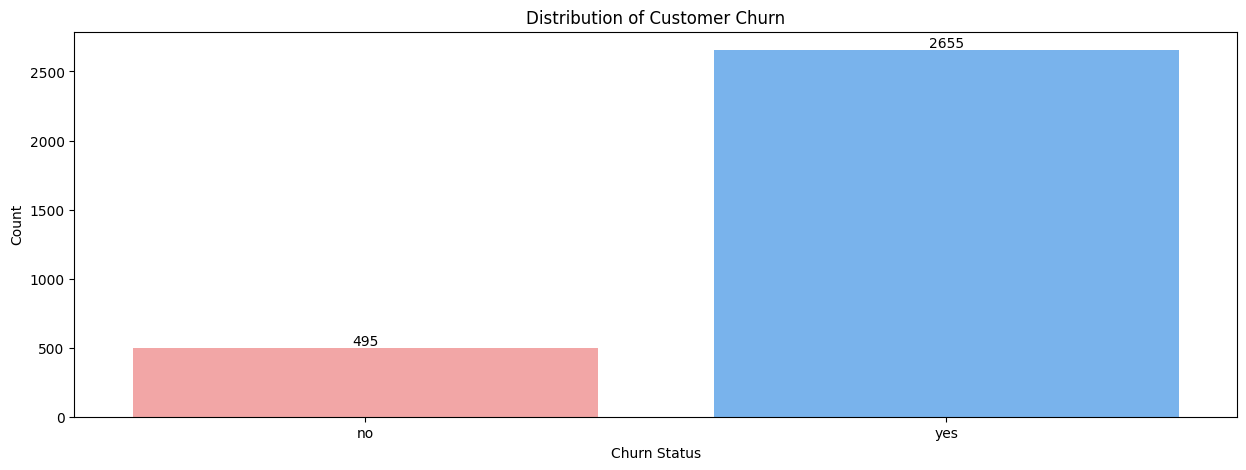

In [37]:
# Create a figure with multiple subplots
fig, (ax1) = plt.subplots(1,figsize=(15, 5))

# Plot 1: Bar plot of churn distribution
sns.countplot(data=data_file, x='Churn', ax=ax1, palette=['#ff9999', '#66b3ff'])
ax1.set_title('Distribution of Customer Churn')
ax1.set_xlabel('Churn Status')
ax1.set_ylabel('Count')

# Add count labels on top of each bar
for i in ax1.containers:
    ax1.bar_label(i)


Task 3:
The Age group is the independant variable, presented on the x-axis. We can learn from this graph that people of Group ages 2 and 3, (ranges around 25-45) are the most people customers who are subscribed in the first place, and they're also the most customers to churn.

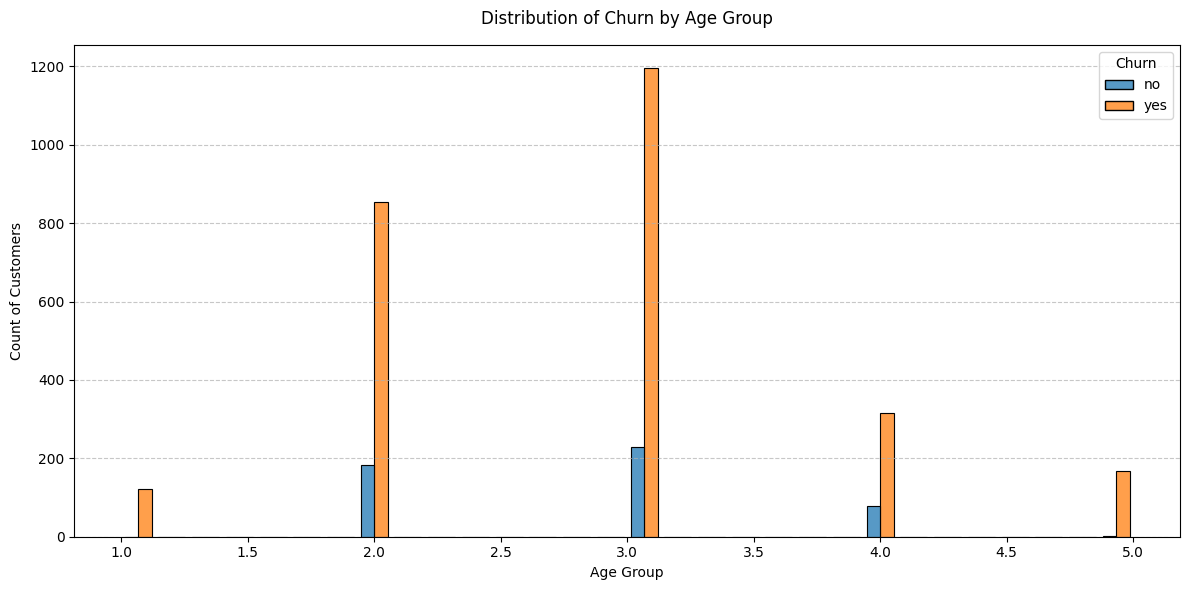

In [43]:
# Create a figure with appropriate size
plt.figure(figsize=(12, 6))

# Create a histogram showing churn distribution for each age group
# Using sns.histplot for better visualization of categorical data
sns.histplot(data=data_frame, 
            x='Age Group',
            hue='Churn',
            multiple="dodge",  # This makes bars appear side by side
            shrink=0.8)       # This adjusts the width of the bars

# Customize the plot
plt.title('Distribution of Churn by Age Group', fontsize=12, pad=15)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count of Customers', fontsize=10)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()